# COVID-19 Project

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("resources/conposcovidloc.csv")
data.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2020-01-21,2020-01-23,2020-01-27,2020-01-23,50s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-01-24,2020-01-24,2020-02-03,2020-01-24,20s,FEMALE,Travel,Resolved,NaN,Middlesex-London Health Unit,50 King Street,London,N6A 5L7,www.healthunit.com,42.981468,-81.254016
3,4,2020-02-05,2020-02-21,2020-02-24,2020-02-22,20s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,5,2020-02-16,2020-02-25,2020-02-25,2020-02-25,60s,FEMALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [6]:
data.describe()

,Row_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,32917.000000,32917.000000,32917.000000
mean,16459.000000,43.759082,-79.473995
std,9502.463742,0.709847,1.542416
min,1.000000,42.308796,-94.488254
25%,8230.000000,43.647471,-79.708893
50%,16459.000000,43.656591,-79.379358
75%,24688.000000,43.898605,-79.379358
max,32917.000000,49.769615,-74.736298


In [7]:
data_drop = data.drop(columns=["Row_ID", "Accurate_Episode_Date", "Test_Reported_Date", "Specimen_Date", "Outbreak_Related",
                              "Reporting_PHU_Address", "Reporting_PHU_Website"])
data_drop.head()

,Case_Reported_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Reporting_PHU,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,2020-01-23,50s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
1,2020-01-23,50s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
2,2020-01-24,20s,FEMALE,Travel,Resolved,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016
3,2020-02-21,20s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
4,2020-02-25,60s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358


In [8]:
data_rename = data_drop.rename(columns={"Case_Reported_Date": "Case Reported Date", "Age_Group": "Age",
                                      "Client_Gender": "Gender", "Case_AcquisitionInfo": "Virus Acquired",
                                     "Outcome1": "Outcome", "Reporting_PHU": "Hospital", "Reporting_PHU_City": "City",
                                     "Reporting_PHU_Postal_Code": "Hospital Postal Code",
                                      "Reporting_PHU_Latitude": "Hospital Latitude",
                                      "Reporting_PHU_Longitude": "Hospital Longitude"})
data_rename.head()

,Case Reported Date,Age,Gender,Virus Acquired,Outcome,Hospital,City,Hospital Postal Code,Hospital Latitude,Hospital Longitude
0,2020-01-23,50s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
1,2020-01-23,50s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
2,2020-01-24,20s,FEMALE,Travel,Resolved,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016
3,2020-02-21,20s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
4,2020-02-25,60s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358


In [9]:
data_rename['Gender'].value_counts()

FEMALE         17770
MALE           14875
UNKNOWN          257
OTHER              8
TRANSGENDER        7
Name: Gender, dtype: int64

In [10]:
data_male = data_rename[data_rename['Gender'] == 'MALE']
data_male.head()

,Case Reported Date,Age,Gender,Virus Acquired,Outcome,Hospital,City,Hospital Postal Code,Hospital Latitude,Hospital Longitude
1,2020-01-23,50s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
5,2020-02-26,60s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
6,2020-02-27,50s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
8,2020-02-28,80s,MALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
10,2020-02-28,60s,MALE,CC,Resolved,Durham Region Health Department,Whitby,L1N 0B2,43.898605,-78.940341


In [11]:
data_female = data_rename[data_rename['Gender'] == 'FEMALE']
data_female.head()

,Case Reported Date,Age,Gender,Virus Acquired,Outcome,Hospital,City,Hospital Postal Code,Hospital Latitude,Hospital Longitude
0,2020-01-23,50s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
2,2020-01-24,20s,FEMALE,Travel,Resolved,Middlesex-London Health Unit,London,N6A 5L7,42.981468,-81.254016
3,2020-02-21,20s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
4,2020-02-25,60s,FEMALE,Travel,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
7,2020-02-27,30s,FEMALE,Travel,Resolved,York Region Public Health Services,Newmarket,L3Y 6Z1,44.048023,-79.480239


In [12]:
data_trans = data_rename[data_rename['Gender'] == 'TRANSGENDER']
data_trans.head()

,Case Reported Date,Age,Gender,Virus Acquired,Outcome,Hospital,City,Hospital Postal Code,Hospital Latitude,Hospital Longitude
838,2020-03-23,<20,TRANSGENDER,CC,Resolved,"Region of Waterloo, Public Health",Waterloo,N2J 4V3,43.462876,-80.520913
22365,2020-05-25,20s,TRANSGENDER,CC,Resolved,Peel Public Health,Mississauga,L5W 1N4,43.647471,-79.708893
27329,2020-05-18,30s,TRANSGENDER,No Epi-link,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
27524,2020-05-03,30s,TRANSGENDER,CC,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
30197,2020-06-12,30s,TRANSGENDER,No Epi-link,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358


In [13]:
data_other = data_rename[(data_rename['Gender'] == 'UNKNOWN') | (data_rename['Gender'] == 'OTHER')]
data_other.head()

,Case Reported Date,Age,Gender,Virus Acquired,Outcome,Hospital,City,Hospital Postal Code,Hospital Latitude,Hospital Longitude
379,2020-03-18,60s,UNKNOWN,CC,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
1010,2020-03-25,90s,UNKNOWN,OB,Fatal,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
1395,2020-03-27,60s,UNKNOWN,OB,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
2291,2020-03-29,80s,UNKNOWN,OB,Fatal,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358
2313,2020-03-29,60s,UNKNOWN,OB,Resolved,Toronto Public Health,Toronto,M5B 1W2,43.656591,-79.379358


In [14]:
data_rename['City'].value_counts()

Toronto             12449
Mississauga          5339
Newmarket            2783
Ottawa               2043
Whitby               1647
Windsor              1235
Waterloo             1206
Hamilton              773
Thorold               730
Oakville              711
London                595
Barrie                527
Guelph                440
Simcoe                401
Brockville            352
Point Edward          279
Port Hope             186
Cornwall              163
Chatham               153
Brantford             129
Owen Sound             96
Peterborough           93
Thunder Bay            87
St. Thomas             81
Timmins                65
Sudbury                64
Kingston               62
Stratford              58
Belleville             44
Pembroke               29
North Bay              28
Kenora                 28
Sault Ste. Marie       23
New Liskeard           18
Name: City, dtype: int64

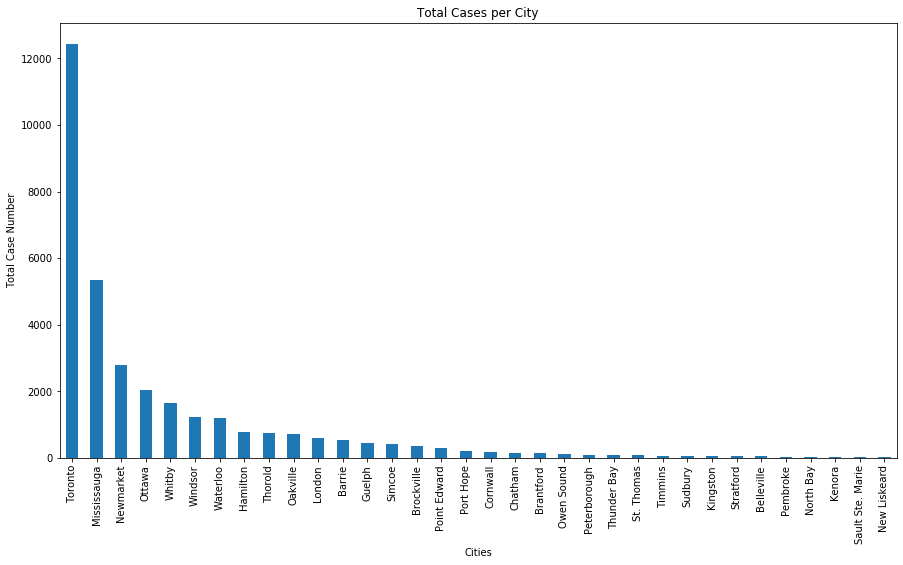

In [21]:
#bar graph for city vs total cases
city_plot = data_rename['City'].value_counts()
city_plot.plot(kind = "bar", figsize = (15,8))
plt.title("Total Cases per City")
plt.xlabel("Cities")
plt.ylabel("Total Case Number")
plt.show()

In [136]:
age_df = pd.DataFrame(data_rename['Age'].value_counts())
age_df = age_df.reset_index()
age_df.replace({'index': r"<20"}, {'index': "10s"}, regex=True, inplace = True)
age_df = age_df.sort_values(["index"],ascending = True)
age_df

,index,Age
8,10s,1460
1,20s,4772
3,30s,4505
2,40s,4693
0,50s,5382
4,60s,3800
6,70s,2565
5,80s,3362
7,90s,2368
9,Unknown,10


In [137]:
age_df_new = age_df.replace({'index': r"10s"}, {'index': "<20"}, regex=True)
age_df_new

,index,Age
8,<20,1460
1,20s,4772
3,30s,4505
2,40s,4693
0,50s,5382
4,60s,3800
6,70s,2565
5,80s,3362
7,90s,2368
9,Unknown,10


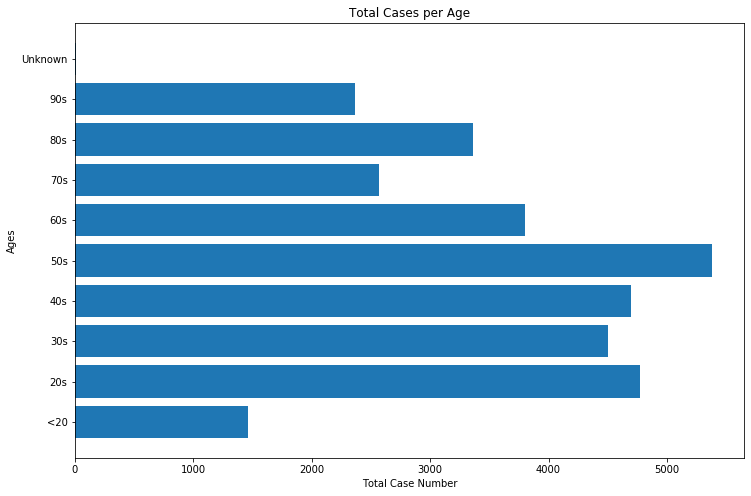

In [139]:
#bar graph for age vs total cases
x_values = age_df_new['index']
y_values = age_df_new['Age']
plt.figure (figsize = (12, 8))
plt.barh(x_values,y_values)
plt.title("Total Cases per Age")
plt.xlabel("Total Case Number")
plt.ylabel("Ages")
plt.show()

In [23]:
data_rename['Virus Acquired'].value_counts()

OB                 12994
CC                  8827
No Epi-link         6549
Travel              1636
No Info-Missing     1514
No Info-Unk         1397
Name: Virus Acquired, dtype: int64

In [88]:
#merge no info-missing and no info-unk as one value
data_rename["Virus Acquired"].replace({"No Info-Missing": "No Info-Unk"}, inplace=True)

In [89]:
#updated series, No Info-Missing 1514 + No Info-Unk 1397=2911
data_rename['Virus Acquired'].value_counts()

OB             12994
CC              8827
No Epi-link     6549
No Info-Unk     2911
Travel          1636
Name: Virus Acquired, dtype: int64

In [100]:
#virus dataframe renamed and cleaned
virus_df = pd.DataFrame(data_rename['Virus Acquired'].value_counts())
virus_df = virus_df.reset_index()
virus_df.replace({'index': r"OB"}, {'index': "Outbreak"}, regex=True, inplace = True)
virus_df.replace({'index': r"CC"}, {'index': "Close Contact"}, regex=True, inplace = True)
virus_df.replace({'index': r"No Epi-link"}, {'index': "Non-Epidemic Link"}, regex=True, inplace = True)
virus_df.replace({'index': r"No Info-Unk"}, {'index': "Unknown"}, regex=True, inplace = True)
virus_df

,index,Virus Acquired
0,Outbreak,12994
1,Close Contact,8827
2,Non-Epidemic Link,6549
3,Unknown,2911
4,Travel,1636


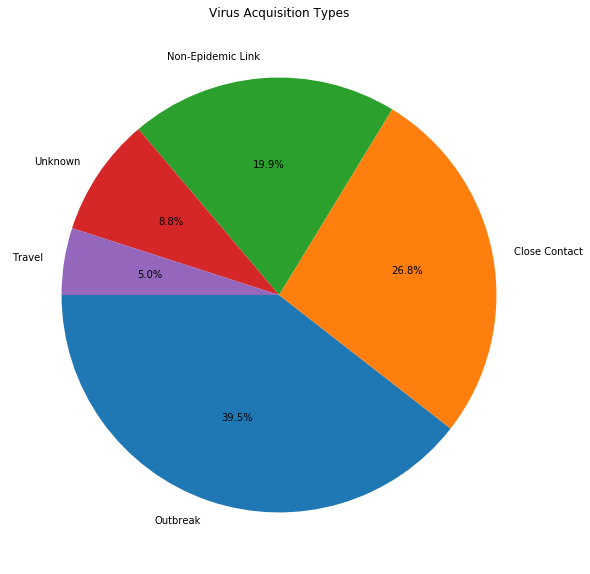

In [111]:
#pie graph for virus acquisition types
plt.figure(figsize = (20, 10))
plt.pie(virus_df["Virus Acquired"], labels=list(virus_df["index"]), autopct="%1.1f%%", startangle=180)
plt.title("Virus Acquisition Types")
plt.show()

In [24]:
data_rename['Outcome'].value_counts()

Resolved        28004
Fatal            2553
Not Resolved     2360
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Virus Outcome Results')

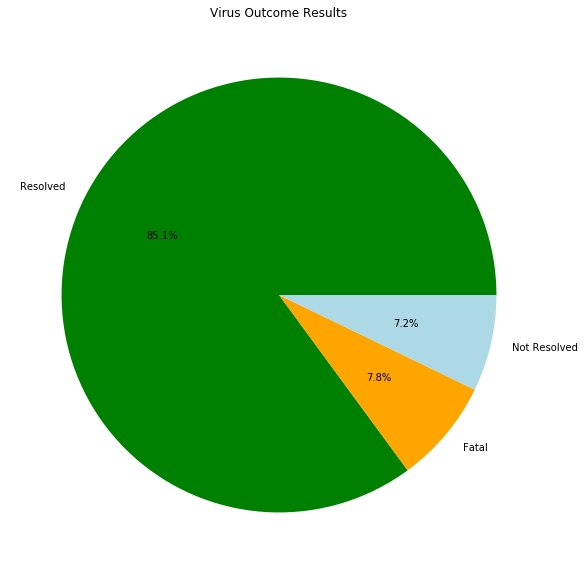

In [62]:
#pie chart for virus outcome results
outcome_pie = data_rename['Outcome'].value_counts()
colors = ["green", "orange","lightblue"]
outcome_pie.plot(kind = "pie", autopct="%1.1f%%", label = "",figsize = (20, 10), colors = colors )
plt.title("Virus Outcome Results")

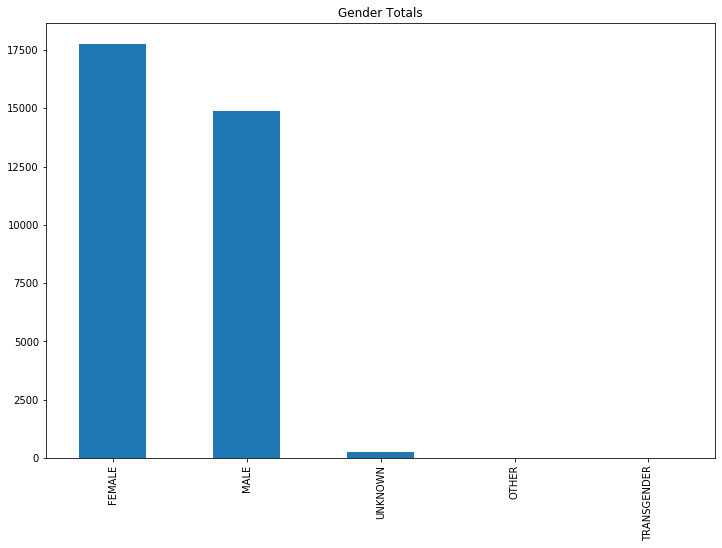

In [209]:
#pie chart for virus outcome results
gender_pie = data_rename['Gender'].value_counts()
gender_pie.plot(kind = "bar", label = "",figsize = (12, 8))
plt.title("Gender Totals")
plt.show()

In [173]:
#line graph dataframe for months vs total cases reported
line_data_df = pd.DataFrame(data_rename['Case Reported Date'].value_counts())
line_data_df = line_data_df.reset_index()
line_data_df = line_data_df.sort_values(["index"],ascending = True)
line_data_df

,index,Case Reported Date
108,2020-01-23,2
114,2020-01-24,1
115,2020-02-21,1
112,2020-02-25,1
113,2020-02-26,1
...,...,...
80,2020-06-13,177
83,2020-06-14,147
79,2020-06-15,182
82,2020-06-16,169


In [174]:
#renaming line graph dataframe for months vs total cases reported
line_data_df[["Year", "Month", "Day"]] = line_data_df["index"].str.split("-", expand=True)
del line_data_df["Year"]
del line_data_df["Day"]
del line_data_df["index"]
line_data_df

,Case Reported Date,Month
108,2,01
114,1,01
115,1,02
112,1,02
113,1,02
...,...,...
80,177,06
83,147,06
79,182,06
82,169,06


In [175]:
#renaming graph dataframe for months vs total cases reported
line_data_df["Month"][line_data_df["Month"] == "01"]="January"
line_data_df["Month"][line_data_df["Month"] == "02"]="February"
line_data_df["Month"][line_data_df["Month"] == "03"]="March"
line_data_df["Month"][line_data_df["Month"] == "04"]="April"
line_data_df["Month"][line_data_df["Month"] == "05"]="May"
line_data_df["Month"][line_data_df["Month"] == "06"]="June"
line_data_df.rename(columns={'Case Reported Date': 'Total Cases Reported'}, inplace=True)
line_data_df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Total Cases Reported,Month
108,2,January
114,1,January
115,1,February
112,1,February
113,1,February
...,...,...
80,177,June
83,147,June
79,182,June
82,169,June


In [189]:

for feb in line_data_df["Month"]:
    feb_df = line_data_df[line_data_df["Month"]=="February"].sum()
feb_df    

Total Cases Reported                                                  14
Month                   FebruaryFebruaryFebruaryFebruaryFebruaryFebruary
dtype: object

In [190]:
feb_df_total = pd.DataFrame(feb_df)
feb_df_total

,0
Total Cases Reported,14
Month,FebruaryFebruaryFebruaryFebruaryFebruaryFebruary


In [191]:
feb_df_total.iloc[0,0]

14

In [192]:

for jan in line_data_df["Month"]:
    jan_df = line_data_df[line_data_df["Month"]=="January"].sum()
jan_df  
jan_df_total = pd.DataFrame(jan_df)
jan_df_total
jan_df_total.iloc[0,0]

3

In [196]:

for mar in line_data_df["Month"]:
    mar_df = line_data_df[line_data_df["Month"]=="March"].sum()
mar_df  
mar_df_total = pd.DataFrame(mar_df)
mar_df_total
mar_df_total.iloc[0,0]

2997

In [197]:
for apr in line_data_df["Month"]:
    apr_df = line_data_df[line_data_df["Month"]=="April"].sum()
apr_df  
apr_df_total = pd.DataFrame(apr_df)
apr_df_total
apr_df_total.iloc[0,0]

14868

In [198]:
for may in line_data_df["Month"]:
    may_df = line_data_df[line_data_df["Month"]=="May"].sum()
may_df  
may_df_total = pd.DataFrame(may_df)
may_df_total
may_df_total.iloc[0,0]

11031

In [199]:
for jun in line_data_df["Month"]:
    jun_df = line_data_df[line_data_df["Month"]=="June"].sum()
jun_df  
jun_df_total = pd.DataFrame(mar_df)
jun_df_total
jun_df_total.iloc[0,0]

2997

In [202]:
import numpy as np

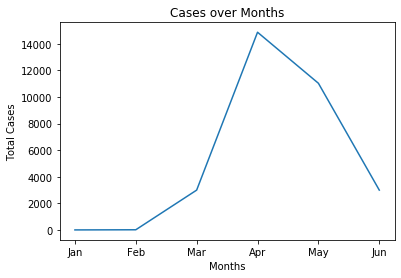

In [206]:
month_list = [jan_df_total.iloc[0,0], feb_df_total.iloc[0,0],mar_df_total.iloc[0,0],apr_df_total.iloc[0,0]
             ,may_df_total.iloc[0,0],jun_df_total.iloc[0,0]]
month_list_2 = ["Jan","Feb","Mar","Apr","May","Jun"]
x = month_list_2
y = month_list
plt.plot(x, y)
plt.title("Cases over Months")
plt.xlabel("Months")
plt.ylabel("Total Cases")
plt.show()